# Dataset generation

Building a baby dataset of features to verify our models work

* 100 samples
* 5 SNR ratios
* 500 total features

In [1]:
import numpy as np
import pandas as pd
import os
import librosa as lr
from librosa import display
%load_ext autoreload

In [2]:
%autoreload 2
import featurization_funcs as featurize

In [4]:
RUN_NAME = '080322_10K'

AUDIO_OUT = '/scratch/ci411/sonos_rirs/reverb_audio'
FEATURES_OUT = '/scratch/ci411/sonos_rirs/features'

audio_path = os.path.join(AUDIO_OUT, RUN_NAME)

if not os.path.exists(audio_path):
    os.makedirs(audio_path)
    
#if not os.path.exists(feature_path):
#    os.makedirs(feature_path)

In [5]:
speech_df = pd.read_csv('./ace_speech.csv')
rir_df = pd.read_csv('./0721_rir_df.csv')

In [6]:
n_samples = 1000 #will be multiplied by number of SNRs
sr = 16000
snr_list = [np.infty, 30, 20, 10, 0]

#audio_df = featurize.generate_rir_audio(n_samples, speech_df, rir_df, sr=sr,\
#                   snr_list=snr_list, out_path=audio_path)
audio_df = pd.read_csv(os.path.join(audio_path, 'audio_df.csv'))

In [7]:
audio_df

,file_speech,length (s),file_rir,room,dataset,vol,snr,clip_label,file_clip
0,/scratch/ci411/sonos_rirs/voice_ace/Speech/F3s...,12.677007,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0,inf,clip0_snr_clean,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
1,/scratch/ci411/sonos_rirs/voice_ace/Speech/F3s...,12.677007,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0,30.0,clip0_snr_30db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
2,/scratch/ci411/sonos_rirs/voice_ace/Speech/F3s...,12.677007,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0,20.0,clip0_snr_20db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
3,/scratch/ci411/sonos_rirs/voice_ace/Speech/F3s...,12.677007,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0,10.0,clip0_snr_10db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
4,/scratch/ci411/sonos_rirs/voice_ace/Speech/F3s...,12.677007,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0,0.0,clip0_snr_0db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
...,...,...,...,...,...,...,...,...,...
9995,/scratch/ci411/sonos_rirs/voice_ace/Speech/M2s...,12.922948,/scratch/ci411/sonos_rirs/rirs/ace/Single/Meet...,ace_Meeting_Room_2,ace,246.0,inf,clip1999_snr_clean,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
9996,/scratch/ci411/sonos_rirs/voice_ace/Speech/M2s...,12.922948,/scratch/ci411/sonos_rirs/rirs/ace/Single/Meet...,ace_Meeting_Room_2,ace,246.0,30.0,clip1999_snr_30db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
9997,/scratch/ci411/sonos_rirs/voice_ace/Speech/M2s...,12.922948,/scratch/ci411/sonos_rirs/rirs/ace/Single/Meet...,ace_Meeting_Room_2,ace,246.0,20.0,clip1999_snr_20db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...
9998,/scratch/ci411/sonos_rirs/voice_ace/Speech/M2s...,12.922948,/scratch/ci411/sonos_rirs/rirs/ace/Single/Meet...,ace_Meeting_Room_2,ace,246.0,10.0,clip1999_snr_10db,/scratch/ci411/sonos_rirs/reverb_audio/080322_...


phase features output shape: (20, 1997)
continuity features output shape: (20, 1997)
Dft output shape: (1, 1997)
Dft output shape: (1, 1997)
Ceptrum output shape: (1, 1997)
Envelope output shape: (1, 1997)
Featurization block output shape: (44, 1997)


/home/ci411/volume_estimation/featurization_funcs.py:159: RuntimeWarning: divide by zero encountered in log
  log_spec_amp = np.log(np.power(np.abs(dft),2))
/scratch/ci411/.conda/envs/s3d_env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


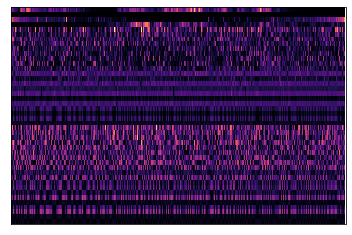

In [12]:
path_audio = audio_df.iloc[0]['file_clip']
y, sr= lr.load(path_audio, sr=sr)
n_samples = len(y)
'''
feature_name = '072722_5k'

gt_f = featurize.gammatone_feat(n_samples)
dft_f = featurize.dft_feat(n_samples, out_len=gt_f.out_shape[1])
dfts_f = featurize.dft_feat(n_samples, is_sorted=True, out_len=gt_f.out_shape[1])
cepstrum_f = featurize.cepstrum_feat(n_samples, out_len=gt_f.out_shape[1]) 
rms_f = featurize.envelope_feat(n_samples, out_len=gt_f.out_shape[1])

feats = [gt_f, dft_f, dfts_f, cepstrum_f, rms_f]
featurizer = featurize.featurizer_block(n_samples, featurizations=feats, out_len=gt_f.out_shape[1])
'''
feature_name = '080122_5k_phase'
phase_f = featurize.gammatone_featurizer(n_samples, 'phase')
cont_f = featurize.gammatone_featurizer(n_samples, 'continuity')
feat_len = phase_f.out_shape[1]
dft_f = featurize.dft_feat(n_samples, out_len=feat_len)
dfts_f = featurize.dft_feat(n_samples, is_sorted=True, out_len=feat_len)
cepstrum_f = featurize.cepstrum_feat(n_samples, out_len=feat_len) 
rms_f = featurize.envelope_feat(n_samples, out_len=feat_len)

feats = [phase_f, cont_f, dft_f, dfts_f, cepstrum_f, rms_f]
featurizer = featurize.featurizer_block(n_samples, featurizations=feats, out_len=feat_len)

feature_example = featurizer.process(y)
lr.display.specshow(feature_example)

In [ ]:
feature_path = os.path.join(FEATURES_OUT, feature_name)
if not os.path.exists(feature_path):
    os.makedirs(feature_path)
feat_df = featurize.process_features(audio_df, featurizer, feature_path, sr=sr)

155it [21:06,  8.30s/it]

In [ ]:
feat_df

<AxesSubplot:>

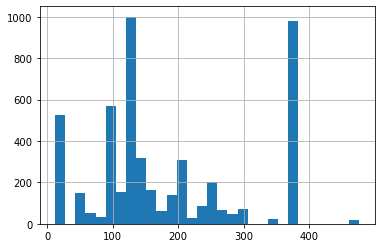

In [26]:
feat_df['vol'].hist(bins=30)

In [33]:
eval_rooms = ['air_office', 'ace_leture_Room_1']

test_df = feat_df[feat_df['room'].isin(eval_rooms)]
train_df = feat_df.drop(test_df.index)
val_df = train_df.sample(frac=.1)
train_df = train_df.drop(val_df.index)

feat_df['split'] = None
feat_df.loc[train_df.index, 'split'] = 'train'
feat_df.loc[val_df.index, 'split'] = 'val'
feat_df.loc[test_df.index, 'split'] = 'test'
feat_df['split'].value_counts()

train    4171
val       464
test      365
Name: split, dtype: int64